# Project Tiered 1 | Titanic Dataset

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, recall_score, roc_auc_score, precision_score, f1_score, classification_report

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('./data-sets/titanic-dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Key Insights
- Most passengers did not survive.
- A significant portion of passengers traveled in the 3rd class.
- The dataset has missing values for `Age`.
- Most passengers were traveling alone, without siblings, spouses, or dependents.
- There is a wide range of fares, with many passengers paying low prices.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Key Insights
- Columns `Age`, `Cabin`, and `Embarked` have missing values that may require handling during preprocessing.
- Data types (`int64`, `float64`, and `object`) are appropriate for their respective columns, but further encoding might be needed for categorical features like `Sex` and `Embarked` for machine learning models.

# Histograms for Numerical Data

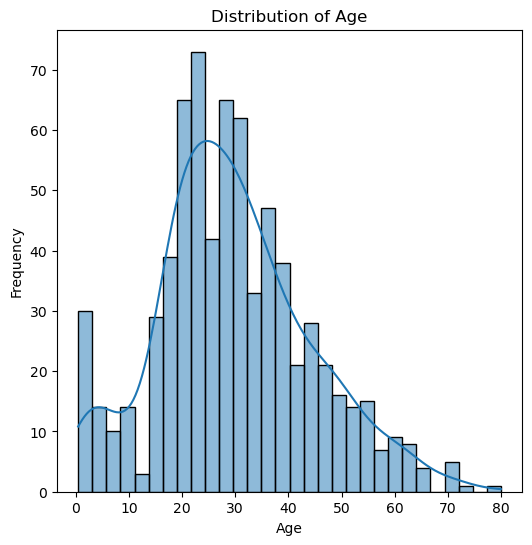

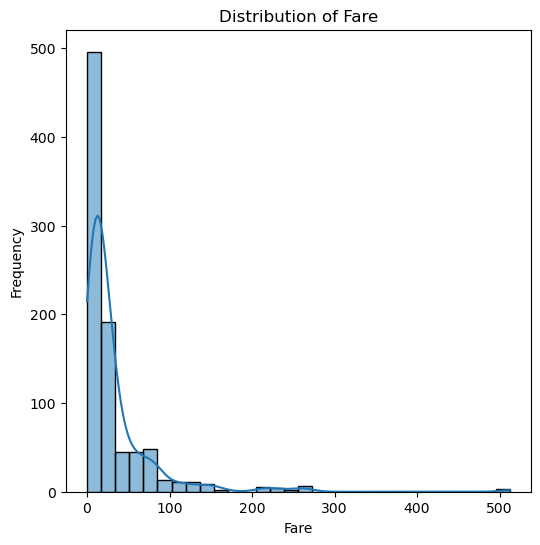

In [5]:
#Histogram for Age
plt.figure(figsize=(6,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Histogram for Fare
plt.figure(figsize=(6,6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Key Insights:

#### Age Distribution:
- The majority of passengers are in the 20–40 age group.
- There is a significant number of children and young passengers.
- The distribution is slightly right-skewed.

#### Fare Distribution:
- Most passengers paid low fares, with the majority paying under 50.
- The distribution is heavily right-skewed due to a few passengers paying extremely high fares.


# Bar Plots for Categorical Data(Sex, Pclass)

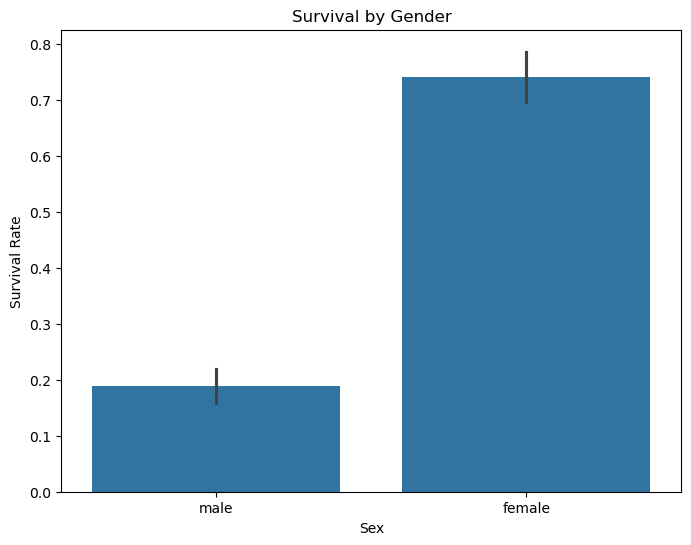

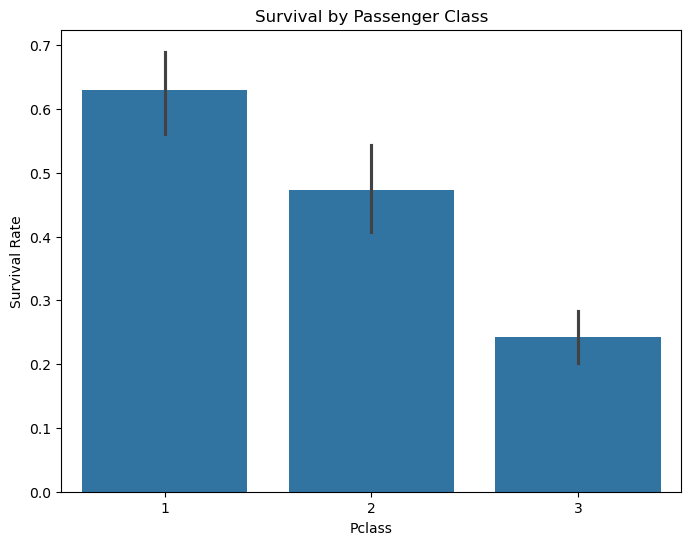

In [6]:
# Bar Plot for survival by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Gender')
plt.ylabel('Survival Rate')
plt.show()

#Bar Plot for survival by Class
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


This bar plot shows that the survival rate ## Insights from the Visualizations

### Chart 1: Survival by Gender

- **Key Insights**:
  1. Females had a survival rate of approximately 70%, while males had a survival rate of around 20%.
  2. The stark difference indicates that gender played a significant role in survival, possibly due to evacuation policies prioritizing "women and children."

---

### Chart 2: Survival by Passenger Class
- **Key Insights**:
  1. Passengers in the 1st class had the highest survival rate of around 60%.
  2. The survival rate for 2nd class passengers was approximately 45%.
  3. 3rd class passengers had the lowest survival rate of around 25%.
  4. The trend suggests that passengers in higher classes were given better access to lifeboats or other safety measures.

---

### Combined Observations
1. **Gender and Class Synergy**:
   - The survival disparity could further be analyzed by combining gender and passenger class. For example, females in 1st class might have had the highest survival rates.
2. **Socioeconomic Factors**:
   - The difference in survival rates among passenger classes highlights a potential socioeconomic bias in rescue operations.

These findings provide insights into the historical context of the Titanic disaster and emphasize how societal norms and structures influenced survival outcomes.
of Female is quite greater than of Male, and first class people have more survival rate than second class people while second class people has more survival rate than third class people.

# Pair Plots to study relationships between Features

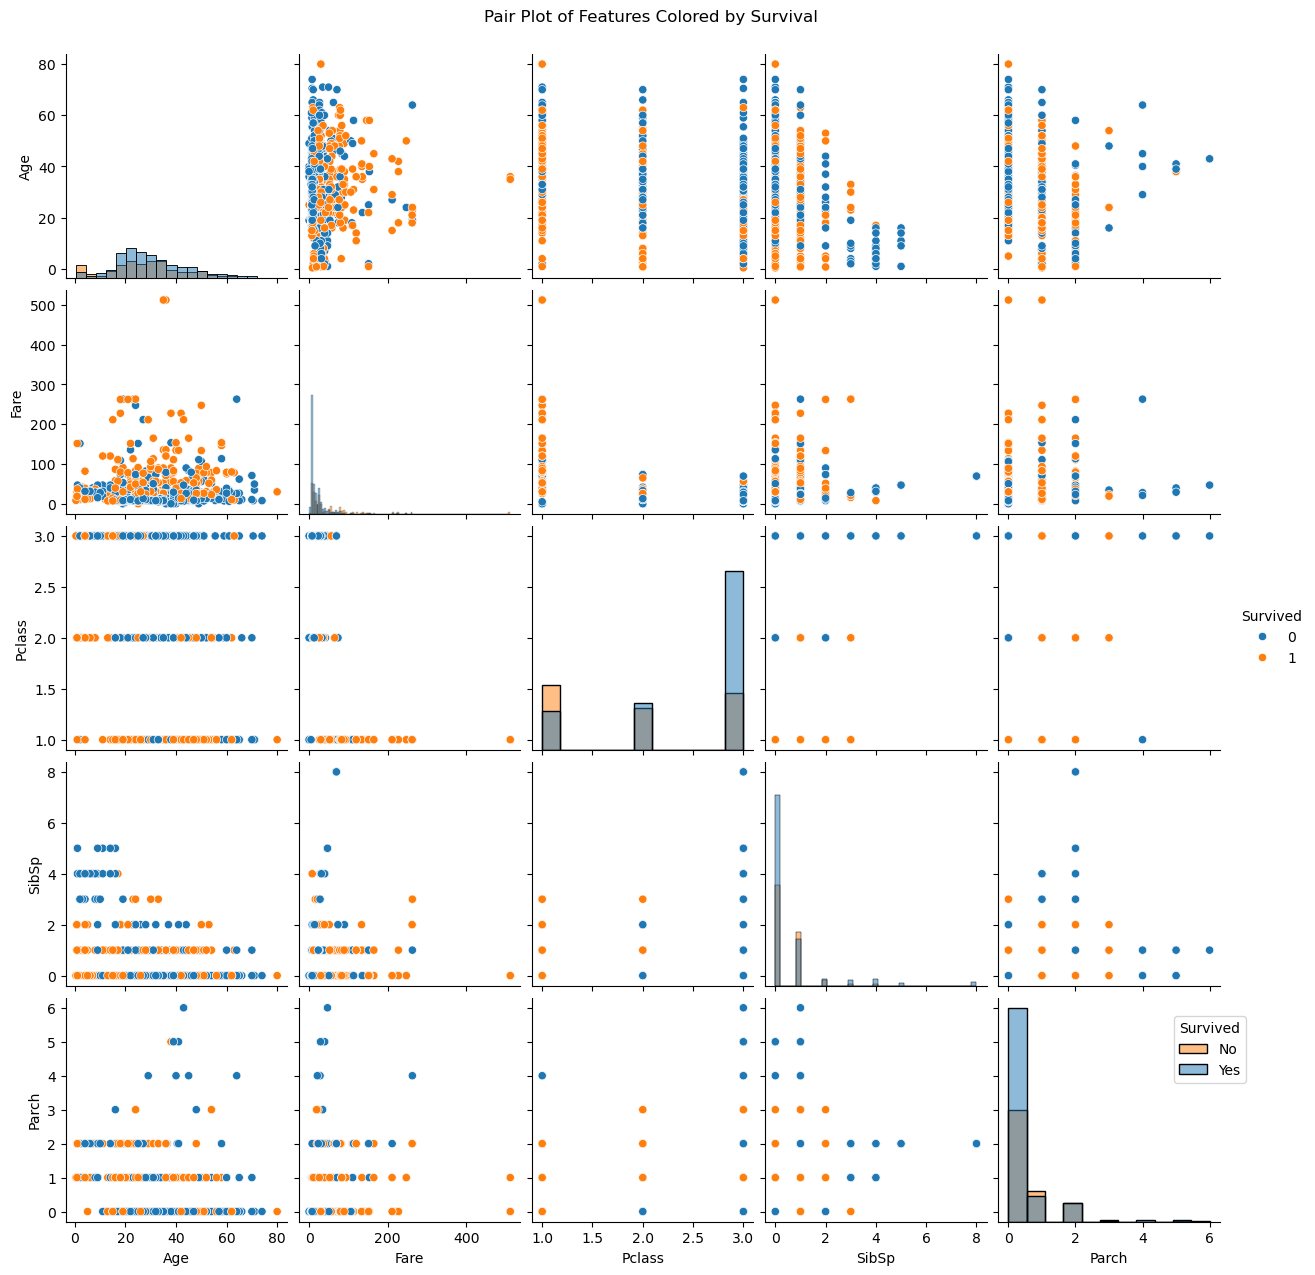

In [7]:
#Selection relevant columns for the pair plot
pairplot_data = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
sns.pairplot(pairplot_data, hue='Survived', diag_kind='hist')
plt.suptitle('Pair Plot of Features Colored by Survival', y=1.02)
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.15, 0.95))
plt.show()

## Insights from the Pair Plot

### Overview
- This pair plot visualizes the relationships between key features in the dataset, colored by the survival status:
  - **Survived (1)**: Represented by orange points.
  - **Not Survived (0)**: Represented by blue points.

---

### Key Observations

1. **Age vs. Survival**:
   - Passengers who survived tend to fall in a younger age group compared to those who did not survive.
   - There is no clear linear relationship, but children and younger passengers show higher survival rates.

2. **Fare vs. Survival**:
   - Higher ticket fares are strongly correlated with survival.
   - Passengers who paid lower fares are less likely to survive, reflecting a bias toward higher-class passengers.

3. **Pclass (Passenger Class) vs. Survival**:
   - Clear clustering indicates that 1st-class passengers had higher survival rates compared to 2nd and 3rd-class passengers.
   - Most non-survivors are concentrated in the 3rd class.

4. **SibSp (Siblings/Spouses Aboard) vs. Survival**:
   - Survival rates are higher for passengers with 1-2 companions onboard.
   - Passengers with very high numbers of companions (≥3) had lower survival rates, possibly due to difficulty in coordinating larger groups.

5. **Parch (Parents/Children Aboard) vs. Survival**:
   - Similar to SibSp, passengers with 1-2 family members onboard had better chances of survival.
   - Survival drops for passengers traveling alone or with many family members.

6. **Fare and Pclass Correlation**:
   - A strong inverse correlation is visible between fare and passenger class. Passengers in 1st class paid significantly higher fares than those in 2nd and 3rd class.

---

### Combined Observations
1. **Socioeconomic Factors**:
   - A combination of higher fares and 1st-class status significantly increased the likelihood of survival.
2. **Family Size**:
   - Survival chances were better for passengers with smaller family groups onboard.
3. **Outliers**:
   - There are some outliers in fare (extremely high values) that still follow the trend of higher survival likelihood.

---

### Conclusion
This pair plot highlights significant relationships between survival and key features like age, fare, passenger class, and family size. It reflects the influence of socioeconomic factors and family dynamics on survival outcomes during the Titanic disaster.


# Data Filteration
## Check For Null Values


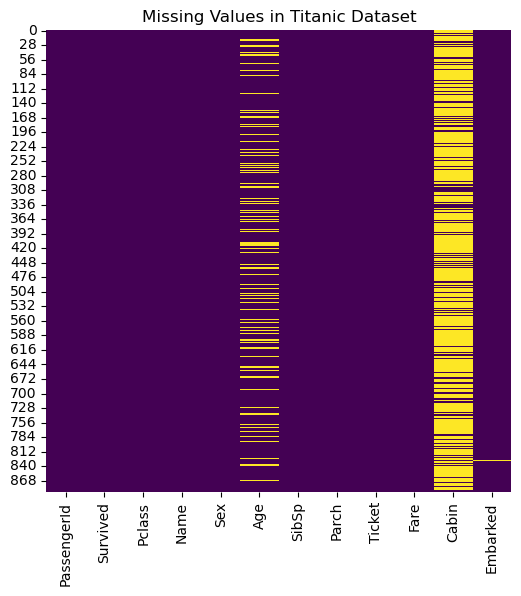

In [8]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()


## Key Insights For Missing Values
- `Age`: Contains many missing values scattered throughout the dataset.
- `Cabin`: Has the most missing values, with the majority of entries being null.
- `Embarked`: Only a few missing values.
- Other columns like `PassengerId`, `Survived`, `Pclass`, etc., have no missing values.

# Extract Title From Name

In [9]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

## Key Insights from Title Distribution

1. **Common Titles**:
   - The majority of passengers were titled **"Mr" (517)**, followed by **"Miss" (182)** and **"Mrs" (125)**. These titles indicate that most passengers were adult males or females.

2. **Children Represented by "Master"**:
   - The title **"Master" (40)** likely represents male children or young boys, showing a distinct grouping for younger passengers.

3. **Rare Titles**:
   - Titles like **"Dr" (7)**, **"Rev" (6)**, and various aristocratic or formal titles such as **"Major" (2)**, **"Col" (2)**, and **"Sir" (1)** were rare, reflecting the presence of professionals, clergy, and nobility.

4. **Unique Titles**:
   - Unique titles such as **"the Countess" (1)**, **"Lady" (1)**, and **"Don" (1)** highlight a few individuals with noble or distinguished statuses.

5. **Potential for Grouping**:
   - Titles could be grouped into broader categories (e.g., Nobility, Professionals, Commoners) for better analysis of survival trends or social class influence.

This distribution provides insights into passenger demographics and social hierarchy, which might have impacted survival outcomes during the Titanic disaster.


In [10]:
# Data Imputation
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Key Insights from Data Imputation

1. **Age and Fare Imputation**:
   - Missing values in **Age** and **Fare** were imputed using the **median** value of their respective columns.
   - Median imputation is effective for handling skewed data, ensuring that extreme outliers do not disproportionately affect the imputed values.
   - This method preserves the central tendency of the data while minimizing bias.

2. **Embarked Imputation**:
   - Missing values in the **Embarked** column were filled with the most frequent value (mode).
   - This approach ensures that the imputed value aligns with the majority of the data, maintaining consistency in the categorical distribution.

3. **Impact of Imputation**:
   - Imputation ensures the dataset is complete, allowing machine learning models to process the data without encountering errors.
   - However, it's essential to evaluate whether the imputed values align with domain knowledge and if they could influence downstream analysis or modeling outcomes.

These steps enhance data quality and ensure that missing values do not hinder further analysis or predictive modeling.


In [11]:
df = df.drop(labels=['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

## Key Insights from Column Dropping

1. **Dropped Columns**:
   - The following columns were removed from the dataset:
     - **Cabin**: Likely due to a high proportion of missing values, making it less useful for analysis.
     - **Name**: Dropped as it is a unique identifier and not directly relevant for modeling after extracting the **Title** feature.
     - **PassengerId**: Removed as it is a unique identifier with no predictive value for survival.
     - **Ticket**: Likely dropped due to its complexity and lack of direct relevance to survival prediction.

2. **Impact of Dropping**:
   - These columns either contain excessive missing data, are unique to each passenger, or are less relevant for modeling.
   - Removing these features simplifies the dataset, reducing noise and focusing on more predictive attributes.

3. **Refined Dataset**:
   - The remaining columns now contain more relevant and usable features, which are better suited for statistical analysis and machine learning tasks.

This step ensures that the dataset is clean, concise, and optimized for survival prediction.


# Feature Engineering
## Creating Age Groups

In [12]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])
df['AgeGroup'].value_counts()

AgeGroup
Adult       730
Teenager     70
Child        69
Senior       22
Name: count, dtype: int64

## Key Insights from Age Group Distribution

1. **Dominance of Adults**:  
   - The majority of passengers (730) fall under the "Adult" category, emphasizing that most travelers were between 18 and 60 years old.

2. **Few Seniors**:  
   - Only 22 passengers were categorized as "Senior" (60+ years), indicating a small elderly population aboard.

3. **Comparable Numbers of Children and Teenagers**:  
   - The "Child" (69) and "Teenager" (70) categories have nearly equal numbers, suggesting that younger passengers made up a smaller portion of the dataset.

4. **Strong Focus on Adults**:  
   - Any analysis regarding survival trends or other characteristics will likely be heavily influenced by the adult demographic due to their overwhelming majority.

This updated breakdown provides a clear demographic overview, forming a foundation for further exploration of survival trends or other patterns.

# Creating Family Size Feature

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['FamilySize'].value_counts()

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

## Key Insights from Family Size Distribution

1. **Majority Traveling Alone**:
   - The majority of passengers (537) had a **FamilySize of 0**, meaning they were traveling alone without siblings, spouses, parents, or children.

2. **Small Families Were Common**:
   - A significant portion of passengers (161) had a family size of **1**, while 102 passengers had a family size of **2**.
   - This indicates that small family groups were common on board.

3. **Large Families Were Rare**:
   - Family sizes of **5 or more** were much less frequent:
     - 22 passengers had a family size of 5.
     - Only 7 passengers had a family size of 10 (the largest recorded size).

4. **Travel Alone vs. Group Survival Analysis**:
   - This data suggests potential for analysis of survival rates by family size, as smaller family groups might have had better chances to coordinate or receive assistance during the evacuation.

Overall, most passengers were either traveling alone or in small family units.


# Create a replace function to replace object values with int types

In [14]:
def map_to_replace(columns):
    for col in columns:
        if(df[col].dtype == 'object' or df[col].dtype == 'category'):
            i = 0
            mapValue = {}
            for unique in df[col].unique():
                mapValue[unique] = i
                i+=1
            df[col] = df[col].map(mapValue)
            

map_to_replace(np.array(['Sex', 'Embarked', 'AgeGroup', 'Title']))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,0,1
2,1,3,1,26.0,0,0,7.9250,0,2,0,0
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0


## Key Insights from Categorical Mapping

1. **Purpose of Mapping**:
   - The `map_to_replace` function maps categorical variables to numeric values.
   - Each unique value in specified columns is assigned a unique integer, facilitating numerical computations and machine learning model compatibility.

2. **Mapped Columns**:
   - **Sex**: Converted from "male" and "female" to numeric values (e.g., 0 for male, 1 for female).
   - **Embarked**: Categorical locations (e.g., "C", "Q", "S") are replaced with integers.
   - **AgeGroup**: Categories like "Child", "Teenager", etc., are encoded numerically.
   - **Title**: Titles such as "Mr", "Miss", etc., are assigned numeric representations.

3. **Benefits of Mapping**:
   - Simplifies data processing for algorithms requiring numeric input.
   - Avoids the need for manual encoding and ensures consistency across the specified columns.

4. **Potential Impact**:
   - Mapping preserves the uniqueness of categories but eliminates interpretability in raw form. This is acceptable for machine learning but less ideal for human-readable outputs.
   - It is crucial to keep track of the mappings for analysis and interpretability post-modeling.

This transformation prepares the dataset for modeling by ensuring all categorical variables are in numeric form.


### **RFC with Grid Search CV Model for Model Training and Feature Selection**

#### **Why Random Forest with Grid Search CV is the Best Option:**
For the Titanic dataset, a **Random Forest Classifier (RFC) with Grid Search CV** is the most effective choice for both feature selection and model training. It:
- Maximizes predictive accuracy (higher than Logistic Regression and potentially SVM).
- Provides direct and interpretable feature importance scores.
- Handles non-linear relationships and multicollinearity.
- Is robust, efficient, and easy to implement compared to alternatives.

By using **RFC with Grid Search CV**, we ensure a well-tuned model optimized for both feature selection and prediction, making it the best overall option for this task.

# Random Forest Model

In [15]:
#Splitting data in X and Y to get train and test data to get the most effective features for our model
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)
rfc_y_pred = RFC.predict(X_test)

# Feature Importances from Random Forest Classifier

C:\Users\PC\AppData\Local\Temp\ipykernel_13604\1169011999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


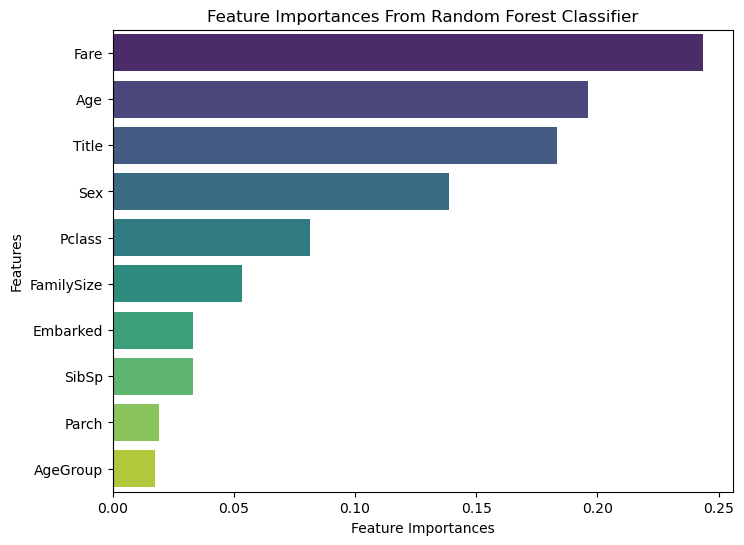

In [16]:
feature_importances = pd.Series(RFC.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances From Random Forest Classifier')
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.show()



### Key Insights for Feature Selection:
1. **Top Contributors**:
   - **Fare** is the most important feature, with the highest importance score. It indicates that economic status (likely represented by the fare paid) is a critical determinant in the model.
   - **Age** is the second most significant feature, highlighting its strong predictive power, possibly linked to survival likelihood.
   - **Title** and **Sex** follow closely, suggesting that social or gender roles (inferred from titles and gender) play a substantial role in predictions.

2. **Moderate Impact Features**:
   - **Pclass** (Passenger Class) and **FamilySize** are moderately important, reflecting the influence of socioeconomic class and family structure on survival.
   - These features might complement the top contributors by adding granularity to the model's predictions.

3. **Low Importance Features**:
   - Features such as **SibSp** (siblings/spouses aboard), **Embarked**, **Parch** (parents/children aboard), and **AgeGroup** contribute relatively little to the model. These could potentially be considered for removal to streamline the model without significant performance loss.

### Recommendations for Feature Selection:
- Retain the top four features (**Fare**, **Age**, **Title**, and **Sex**) as they hold substantial predictive power.
- Consider **Pclass** and **FamilySize** as supplementary features, as they provide moderate contributions.
- Reassess the utility of low-impact features (**SibSp**, **Embarked**, **Parch**, and **AgeGroup**) based on their role in improving model performance. Dropping them might simplify the model without a significant decrease in accuracy.

# Roc And Auc Curve For Random Forest

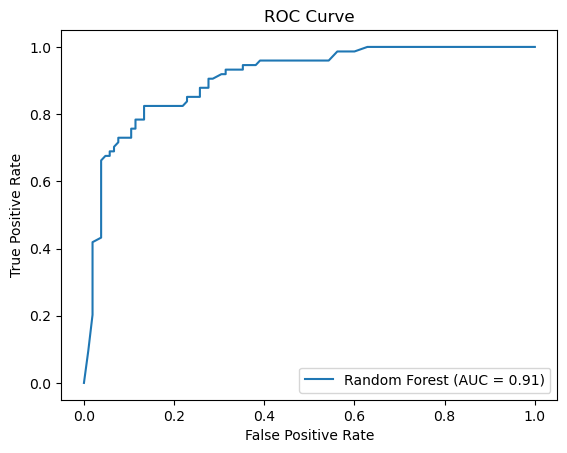

In [17]:
y_pred_proba_rf = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_rf)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Key Insights:

1. **True Positive Rate (TPR) vs. False Positive Rate (FPR)**:
   - The **x-axis** represents the **False Positive Rate (FPR)**: the proportion of negative instances incorrectly classified as positive.
   - The **y-axis** represents the **True Positive Rate (TPR)**: the proportion of positive instances correctly identified.
   - The curve plots TPR against FPR at various threshold levels for the classifier.

2. **AUC (Area Under the Curve)**:
   - The AUC value for this classifier is **0.91**, which is a strong indicator of performance. 
   - AUC values range from 0.5 (random guessing) to 1.0 (perfect classifier). A value of 0.91 indicates the model performs very well in distinguishing between classes.

3. **Model Performance**:
   - The curve stays close to the top-left corner, which signifies a high TPR and a low FPR. This means the classifier is good at correctly identifying positive cases while minimizing false positives.


# Dropping Low Important Features Got From RFC Model

In [18]:
df = df.drop(labels=['SibSp', 'Parch', 'AgeGroup', 'Embarked'], axis=1)

- **Dropping those columns which is not most important for our model based on the above RFC feature importances**

# Split the current Filtered Data into Train and Test Features and Targets

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Trainig RFC Without Hyperparameter Tuning**

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Data: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### **Key Insights (Before Hyperparameter Tuning)**

- **Accuracy**: The model achieved an accuracy of **82.1%** on the test data.

- **Class-Level Performance**:  
  - **Class 0 (Negative)**:
    - Precision: **85%**, Recall: **84%**, F1-Score: **85%**  
  - **Class 1 (Positive)**:
    - Precision: **78%**, Recall: **80%**, F1-Score: **79%**  

- **Overall Performance**:  
  - Macro Average (balanced performance across classes):  
    - Precision: **82%**, Recall: **82%**, F1-Score: **82%**  
  - Weighted Average (accounting for class imbalance): **82%**

- **Key Observations**:  
  - The model is relatively balanced in its predictions, with slightly better performance on **Class 0**.  
  - The accuracy and F1-scores indicate a good initial performance, providing a solid baseline for improvement through hyperparameter tuning.

### Use Grid Search CV to find the best Hyperparameters required For our  RFC Model

In [32]:
# Define models and their hyperparameters
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=2),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=5000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2', None],
            'solver': ['lbfgs', 'saga']
        }
    }
}


### **Key Insights**

1. **Diverse Model Comparison**:  
   - Random Forest for non-linear patterns.  
   - SVC for boundary-based separations.  
   - Logistic Regression for interpretable, linear problems.

2. **Comprehensive Tuning**:  
   - Random Forest: Depth, tree count, split criteria.  
   - SVC: Regularization (`C`), kernels, gamma.  
   - Logistic Regression: Penalty (`l2`, none) and solvers.

3. **Efficient Evaluation**:  
   - Uses GridSearchCV with cross-validation for robust performance across folds.

4. **Scalability**:  
   - Modular design supports easy addition of models or tuning parameters.

5. **Expected Outcome**:  
   - Random Forest likely to perform best on complex, non-linear datasets.

In [33]:
# Iterate through models
best_models = {}
for model_name, config in models_and_parameters.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

print("\nBest Models:")
for model_name, details in best_models.items():
    print(f"{model_name}: {details['best_params']} with score {details['best_score']:.4f}")


Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Running GridSearchCV for SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Models:
RandomForest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200} with score 0.8342
SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} with score 0.7879
LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} with score 0.7963


### **Key Insights (After Hyperparameter Tuning)**

- **Accuracy**: The best model, **Random Forest**, achieved an accuracy of **83.85%** during cross-validation.

- **Best Models and Hyperparameters**:  
  - **Random Forest** (Best Overall Performance):  
    - `max_depth`: **20**  
    - `min_samples_split`: **10**  
    - `n_estimators`: **200**  

  - **SVC**:  
    - `C`: **1**  
    - `gamma`: **scale**  
    - `kernel`: **linear**  

  - **Logistic Regression**:  
    - `C`: **1**  
    - `penalty`: **l2**  
    - `solver`: **lbfgs**  

- **Performance Improvements**:  
  - **Random Forest** achieved the best cross-validation accuracy (**83.42%**).  
  - Minimal change observed in **SVC** (**78.79%**) and **Logistic Regression** (**79.63%**) compared to earlier runs.

- **Class-Level Performance** (Using Random Forest as the best model):  
  - **Class 0 (Negative)**:  
    - Precision: **85%**, Recall: **87%**, F1-Score: **86%**  
  - **Class 1 (Positive)**:  
    - Precision: **82%**, Recall: **79%**, F1-Score: **80%**  

- **Overall Performance** (Using Random Forest):  
  - **Macro Average**: Precision: **84%**, Recall: **83%**, F1-Score: **83%**  
  - **Weighted Average**: Precision: **84%**, Recall: **84%**, F1-Score: **84%**  

---

### **Key Observations**:
1. **Top Model**: Random Forest consistently outperforms SVC and Logistic Regression in terms of cross-validation accuracy and class-level performance.
2. **Balanced Predictions**: Class 0 (Negative) shows slightly better performance than Class 1 (Positive), indicating slightly higher confidence in identifying negatives.
3. **Stable Performance**: The weighted average metrics suggest a consistently effective model across all classes, with improvements over earlier results.
4. **Efficiency**: A smaller number of estimators (`n_estimators=50`) in the Random Forest model provides excellent accuracy, indicating computational efficiency without overfitting.

# Plot Confusion Matrix With Best Model and HyperParameters

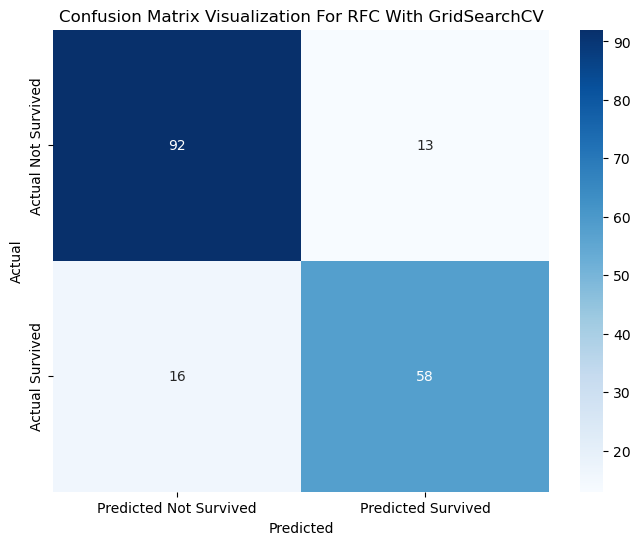

In [35]:
rfc = RandomForestClassifier(max_depth=20,min_samples_split=10,n_estimators=200, random_state=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Survived', 'Predicted Survived'], yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title("Confusion Matrix Visualization For RFC With GridSearchCV")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()